## Goal of this notebook:

The goal of this notebook is to study top_k_reader parameter by creating prediction CSVs for different top_k_retriever parameters and evaluating them. For that matter, we will use the **best threshold**, found in the "evaluation_topkreader" to be equal to **6**.

---

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../functions/')

from haystack_setup import *
from question_answering import *
from threshold_reader import *
from metrics import *

## Initializing the model

In [3]:
# Start Elasticsearch using Docker
! docker run -d -p 9200:9200 -e "discovery.type=single-node" elasticsearch:7.9.2

b759a3f8e8c106bd4ee7b59549dcba20e8606dba19782b2c22655d865969bde9


In [4]:
# wait about 30 seconds after starting the docker container before running this cell
pipe = haystack_setup()

06/02/2021 10:46:52 - INFO - faiss.loader -   Loading faiss.
06/02/2021 10:46:52 - INFO - faiss.loader -   Loading faiss.
06/02/2021 10:46:58 - INFO - farm.modeling.prediction_head -   Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
06/02/2021 10:47:02 - INFO - faiss.loader -   Loading faiss.
06/02/2021 10:47:02 - INFO - faiss.loader -   Loading faiss.
06/02/2021 10:47:04 - INFO - elasticsearch -   HEAD http://localhost:9200/ [status:200 request:0.419s]
06/02/2021 10:47:05 - INFO - elasticsearch -   PUT http://localhost:9200/document [status:200 request:1.178s]
06/02/2021 10:47:06 - INFO - elasticsearch -   PUT http://localhost:9200/label [status:200 request:0.548s]
06/02/2021 10:47:06 - INFO - elasticsearch -   POST http://localhost:9200/document/_delete_by_query [status:200 request:0.240s]
06/02/2021 10:47:15 - INFO - elasticsearch -   POST http://localhost:9200/_bulk?refresh=wait_for [status:200 request:1.724s]
06/02/2021 10:47:15 - INFO - 

---

## Trying out different top_k_retriever values

In [5]:
#Importing validation dataset. It contains the answers to the questions provided by INCM, to evaluate the model
result = pd.read_csv('../../data/final_data/model_validation/Model_Validation.csv')
result.head(3)

Unnamed: 0  \
0           3   
1          10   
2          13   

                                                            QUERY/PERGUNTA  \
0               Como se conta o tempo  de serviço em acumulação de cargos?   
1  Quando deve ser apresentado o requerimento para aposentação voluntária?   
2                             Quem pode requerer a aposentação antecipada?   

                  TÓPICO   \
0    ACUMULAÇÃO DE CARGOS   
1            ANTECEDÊNCIA   
2  APOSENTAÇÃO ANTECIPADA   

                                                                          RESPOSTA  \
0  O tempo de serviço prestado  simultâneamente em dois ou mais cargos ou situa...   
1  O pedido de aposentação pode ser apresentado com a antecedência máxima de tr...   
2  Podem requerer a aposentação antecipada, independentemente de submissão a ju...   

   ARTIGO RESPOSTA2 ARTIGO2 RESPOSTA3 ARTIGO3 RESPOSTA4 ARTIGO4 RESPOSTA5  \
0    31.º       NaN     NaN       NaN     NaN       NaN     NaN       NaN   
1    39.º       NaN     NaN       NaN     NaN       NaN     NaN       NaN   
2  37.º-A       NaN     NaN       NaN     NaN       NaN     NaN       NaN   

  ARTIGO5 RESPOSTA6 ARTIGO6               ESTATUTO EXTERNO RELACIONADO  \
0     NaN       NaN     NaN  Lei Geral do Trabalho em Funções Públicas   
1     NaN       NaN     NaN                                        NaN   
2     NaN       NaN     NaN                                        NaN   

  Combined  
0   ['31']  
1   ['39']  
2  ['37A']

## top_k_retriever = 3:

In [ ]:
# Getting the predictions for top_k_retriever = 3
# No need to run this cell, otherwise it takes too much time. The csv is stored in 'final_data/model_validation/predictions_reader3.csv'

# Create prediction list
list_of_queries = list(result['QUERY/PERGUNTA'].iloc[:])
predictions_list = []

# Loop over the questions, run them through the model and save the predictions the model retrieves
for query in list_of_queries:
    prediction_ = question_answering(query=query, pipeline=pipe, top_k_retriever=3, top_k_reader=5) # running the queries in the model
    predictions_list.append(prediction_['answers']) # saving answers in list
    
pd.DataFrame(predictions_list).to_csv('../../data/final_data/model_validation/predictions_reader3.csv')

In [21]:
# Reading from the csv with predictions for top_k_retriever = 3
reader3_df = pd.read_csv('../../data/final_data/model_validation/predictions_reader3.csv', index_col = 0)

reader3_df.head(5)

0  \
0  {'answer': 'atender-se-á à média destas', 'score': 4.026272296905518, 'proba...   
1  {'answer': 'quando tem lugar a requerimento do subscritor, nos casos em que ...   
2  {'answer': 'os subscritores que tenham, pelo menos, 60 anos de idade e que, ...   
3  {'answer': 'autoridade competente', 'score': 6.56984806060791, 'probability'...   
4  {'answer': 'nos casos permitidos em lei especial', 'score': 2.02609348297119...   

                                                                                 1  \
0  {'answer': '6 por cento do total da remuneração que competir ao cargo \n\nex...   
1  {'answer': 'com a antecedência máxima de três meses', 'score': 0.81030446290...   
2  {'answer': 'pelo subscritor', 'score': 6.957225799560547, 'probability': 0.4...   
3  {'answer': 'nos termos gerais', 'score': 0.16699659824371338, 'probability':...   
4  {'answer': 'quando\n\nhaja lei especial que o permita', 'score': 0.748566567...   

                                                                                 2  \
0  {'answer': 'n.º 1 do artigo 6.º, com exceção das que \n\nnão tiverem carácte...   
1  {'answer': 'quando, por facto não imputável ao \n\ninteressado, tenha havido...   
2  {'answer': 'interessado', 'score': 1.2121596336364746, 'probability': 0.0037...   
3  {'answer': 'pena disciplinar de aposentação ou reforma compulsiva', 'score':...   
4  {'answer': 'a pensão é calculada nos termos gerais e reduzida em 4,5% do seu...   

                                                                                 3  \
0                                                                              NaN   
1  {'answer': 'uma data posterior', 'score': -1.912743330001831, 'probability':...   
2  {'answer': 'interessado', 'score': -0.6185919046401978, 'probability': 0.499...   
3  {'answer': 'membros do Governo \n\nresponsáveis pelas áreas das finanças e d...   
4  {'answer': 'força de aplicação da \n\npena disciplinar de aposentação ou ref...   

                                                                                 4  
0                                                                              NaN  
1                                                                              NaN  
2                                                                              NaN  
3  {'answer': 'membros do \n\nGoverno responsáveis pelas áreas das finanças e d...  
4                                                                              NaN

In [22]:
exact_match_metric(pred_articles_list = threshold_reader(reader3_df, score_threshold=6), 
                   answers_list = list(result['Combined']))

47.31

In [23]:
cosine_similarity_metric(pred_articles_list = threshold_reader(reader3_df, score_threshold=6), 
                   answers_list = list(result['Combined']))

58.59

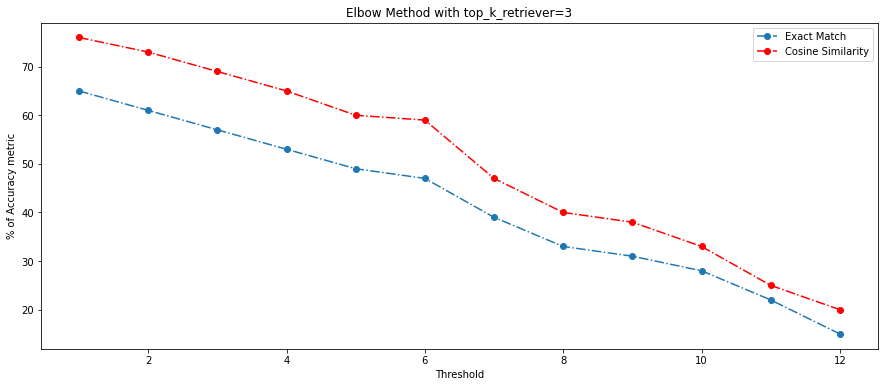

In [24]:
accuracy_rnd = []
cosine_rnd = []
for threshold in range(1,13):
        accuracy_rnd.append(round(exact_match_metric(pred_articles_list = threshold_reader(reader3_df, score_threshold=threshold), 
                   answers_list = list(result['Combined'])),0))
        cosine_rnd.append(round(cosine_similarity_metric(pred_articles_list = threshold_reader(reader3_df, score_threshold=threshold), 
                   answers_list = list(result['Combined'])),0))
        
plt.figure(figsize=(15,6))
plt.plot(range(1,13), accuracy_rnd, '-.',
         marker='o', label='Exact Match')
plt.plot(range(1,13), cosine_rnd, '-.',
         marker='o', c='r', label='Cosine Similarity')
plt.title('Elbow Method with top_k_retriever=3')

plt.xlabel("Threshold")
plt.ylabel("% of Accuracy metric")
plt.legend()
plt.show()      

## top_k_retriever = 5:

In [6]:
# Getting the predictions for top_k_retriever = 5
# No need to run this cell, otherwise it takes too much time. The csv is stored in 'final_data/model_validation/predictions_reader5.csv'

# Create prediction list
list_of_queries = list(result['QUERY/PERGUNTA'].iloc[:])
predictions_list = []

# Loop over the questions, run them through the model and save the predictions the model retrieves
for query in list_of_queries:
    prediction_ = question_answering(query=query, pipeline=pipe, top_k_retriever=5, top_k_reader=5) # running the queries in the model
    predictions_list.append(prediction_['answers']) # saving answers in list
    
pd.DataFrame(predictions_list).to_csv('../../data/final_data/model_validation/predictions_reader5.csv')

06/02/2021 10:48:29 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.252s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.57s/ Batches]
06/02/2021 10:49:15 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.185s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.34s/ Batches]
06/02/2021 10:49:28 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.029s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.81s/ Batches]
06/02/2021 10:49:41 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.088s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.89s/ Batches]
06/02/2021 10:50:01 - INFO - elasticsearch -

In [17]:
# Reading from the csv with predictions for top_k_retriever = 5
reader5_df = pd.read_csv('../../data/final_data/model_validation/predictions_reader5.csv', index_col = 0)

reader5_df.head(5)

0  \
0  {'answer': 'por acréscimo ao tempo de subscritor', 'score': 10.0079183578491...   
1  {'answer': 'dois anos após a aplicação da pena', 'score': 8.748945236206055,...   
2  {'answer': 'os subscritores que tenham, pelo menos, 60 anos de idade e que, ...   
3  {'answer': 'autoridade competente', 'score': 6.56984806060791, 'probability'...   
4  {'answer': 'quando resulta de simples determinação da lei ou de imposição da...   

                                                                                 1  \
0  {'answer': 'não é contado cumulativamente', 'score': 9.724143028259277, 'pro...   
1  {'answer': 'quando a cessação definitiva de funções ocorra após cinco anos d...   
2  {'answer': 'pelo subscritor', 'score': 6.957225799560547, 'probability': 0.4...   
3  {'answer': 'da autoridade competente', 'score': 0.7517193555831909, 'probabi...   
4  {'answer': 'nos casos permitidos em lei especial', 'score': 2.02609348297119...   

                                                                                 2  \
0  {'answer': 'atender-se-á à média destas', 'score': 4.026272296905518, 'proba...   
1  {'answer': 'no prazo que, para o efeito, a\n\nCaixa houver fixado', 'score':...   
2  {'answer': 'do subscritor', 'score': 3.7441859245300293, 'probability': 0.73...   
3  {'answer': 'nos termos gerais', 'score': 0.16699659824371338, 'probability':...   
4  {'answer': 'quando\n\nhaja lei especial que o permita', 'score': 0.748566567...   

                                                                                 3  \
0  {'answer': '6 por cento do total da remuneração que competir ao cargo \n\nex...   
1  {'answer': 'quando tem lugar a requerimento do subscritor, nos casos em que ...   
2  {'answer': 'interessado', 'score': 1.2121596336364746, 'probability': 0.0037...   
3  {'answer': 'pena disciplinar de aposentação ou reforma compulsiva', 'score':...   
4  {'answer': 'quando de outro modo se dispuser, o regime legal relativo aos ap...   

                                                                                 4  
0  {'answer': 'n.º 1 do artigo 6.º, com exceção das que \n\nnão tiverem carácte...  
1  {'answer': 'com a antecedência máxima de três meses', 'score': 0.81030446290...  
2  {'answer': 'interessado', 'score': -0.6185919046401978, 'probability': 0.499...  
3  {'answer': 'CGA', 'score': -3.3834142684936523, 'probability': 0.00292672682...  
4  {'answer': 'a pensão é calculada nos termos gerais e reduzida em 4,5% do seu...

In [18]:
exact_match_metric(pred_articles_list = threshold_reader(reader5_df, score_threshold=6), 
                   answers_list = list(result['Combined']))

50.54

In [19]:
cosine_similarity_metric(pred_articles_list = threshold_reader(reader5_df, score_threshold=6), 
                   answers_list = list(result['Combined']))

63.73

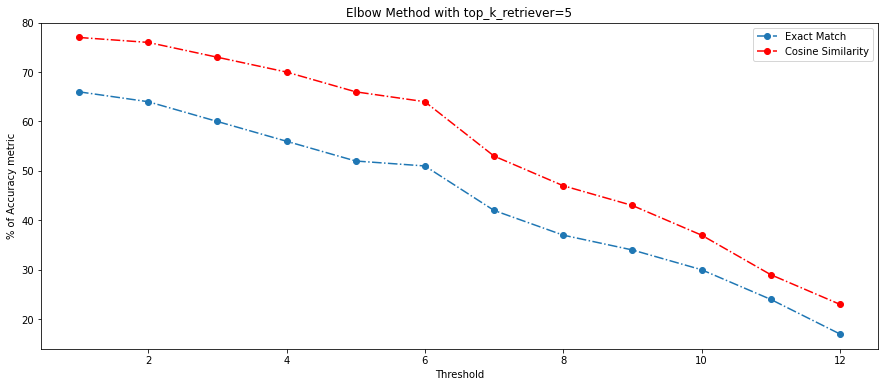

In [20]:
accuracy_rnd = []
cosine_rnd = []
for threshold in range(1,13):
        accuracy_rnd.append(round(exact_match_metric(pred_articles_list = threshold_reader(reader5_df, score_threshold=threshold), 
                   answers_list = list(result['Combined'])),0))
        cosine_rnd.append(round(cosine_similarity_metric(pred_articles_list = threshold_reader(reader5_df, score_threshold=threshold), 
                   answers_list = list(result['Combined'])),0))
        
plt.figure(figsize=(15,6))
plt.plot(range(1,13), accuracy_rnd, '-.',
         marker='o', label='Exact Match')
plt.plot(range(1,13), cosine_rnd, '-.',
         marker='o', c='r', label='Cosine Similarity')
plt.title('Elbow Method with top_k_retriever=5')

plt.xlabel("Threshold")
plt.ylabel("% of Accuracy metric")
plt.legend()
plt.show()

## top_k_retriever = 10:

In [25]:
# Getting the predictions for top_k_retriever = 10
# No need to run this cell, otherwise it takes too much time. The csv is stored in 'final_data/model_validation/predictions_reader10.csv'

# Create prediction list
list_of_queries = list(result['QUERY/PERGUNTA'].iloc[:])
predictions_list = []

# Loop over the questions, run them through the model and save the predictions the model retrieves
for query in list_of_queries:
    prediction_ = question_answering(query=query, pipeline=pipe, top_k_retriever=10, top_k_reader=5) # running the queries in the model
    predictions_list.append(prediction_['answers']) # saving answers in list
    
pd.DataFrame(predictions_list).to_csv('../../data/final_data/model_validation/predictions_reader10.csv')

06/02/2021 11:45:11 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.070s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/ Batches]
06/02/2021 11:45:31 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.059s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.98s/ Batches]
06/02/2021 11:45:59 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.085s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/ Batches]
06/02/2021 11:46:22 - INFO - elasticsearch -   POST http://localhost:9200/document/_search [status:200 request:0.057s]
Inferencing Samples: 100%|█████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.31s/ Batches]
06/02/2021 11:46:42 - INFO - elasticsearch -

In [26]:
# Reading from the csv with predictions for top_k_retriever = 10
reader10_df = pd.read_csv('../../data/final_data/model_validation/predictions_reader10.csv', index_col = 0)

reader10_df.head(5)

0  \
0  {'answer': 'por acréscimo ao tempo de subscritor', 'score': 10.0079183578491...   
1  {'answer': 'dois anos após a aplicação da pena', 'score': 8.748945236206055,...   
2  {'answer': 'os subscritores que tenham, pelo menos, 60 anos de idade e que, ...   
3  {'answer': 'pelo competente órgão \n\nsuperior da Administração Pública', 's...   
4  {'answer': 'quando resulta de simples determinação da lei ou de imposição da...   

                                                                                 1  \
0  {'answer': 'não é contado cumulativamente', 'score': 9.724143028259277, 'pro...   
1  {'answer': 'quando a cessação definitiva de funções ocorra após cinco anos d...   
2  {'answer': 'pelo interessado', 'score': 8.271023750305176, 'probability': 0....   
3  {'answer': 'autoridade competente', 'score': 6.56984806060791, 'probability'...   
4  {'answer': 'quando o subscritor, tendo, pelo menos, cinco anos de serviço: a...   

                                                                                 2  \
0  {'answer': 'Não será contado', 'score': 6.0399885177612305, 'probability': 0...   
1  {'answer': 'no prazo que, para o efeito, a\n\nCaixa houver fixado', 'score':...   
2  {'answer': 'pelo subscritor', 'score': 6.957225799560547, 'probability': 0.4...   
3  {'answer': 'lei especial', 'score': 6.424572944641113, 'probability': 0.9537...   
4  {'answer': 'quando o subscritor, tendo, pelo menos, cinco anos de serviço', ...   

                                                                                 3  \
0  {'answer': 'no cálculo da pensão inicial', 'score': 5.235822677612305, 'prob...   
1  {'answer': 'quando tem lugar a requerimento do subscritor, nos casos em que ...   
2  {'answer': 'pelo competente órgão \n\nsuperior da Administração Pública', 's...   
3  {'answer': 'Caixa', 'score': 4.70919132232666, 'probability': 0.610314249992...   
4  {'answer': 'quando se trate de tempo não sobreposto', 'score': 5.13328123092...   

                                                                                 4  
0  {'answer': 'levadas em conta na atribuição \n\ndos encargos respetivos', 'sc...  
1  {'answer': 'à data em \n\nque seja recebido o pedido de aposentação pela CGA...  
2  {'answer': 'do subscritor', 'score': 3.7441859245300293, 'probability': 0.73...  
3  {'answer': 'Caixa', 'score': 1.0085740089416504, 'probability': 0.3595959842...  
4  {'answer': 'Quando a eliminação da qualidade de subscritor tiver resultado d...

In [30]:
exact_match_metric(pred_articles_list = threshold_reader(reader10_df, score_threshold=6), 
                   answers_list = list(result['Combined']))

48.39

In [31]:
cosine_similarity_metric(pred_articles_list = threshold_reader(reader10_df, score_threshold=6), 
                   answers_list = list(result['Combined']))

65.87

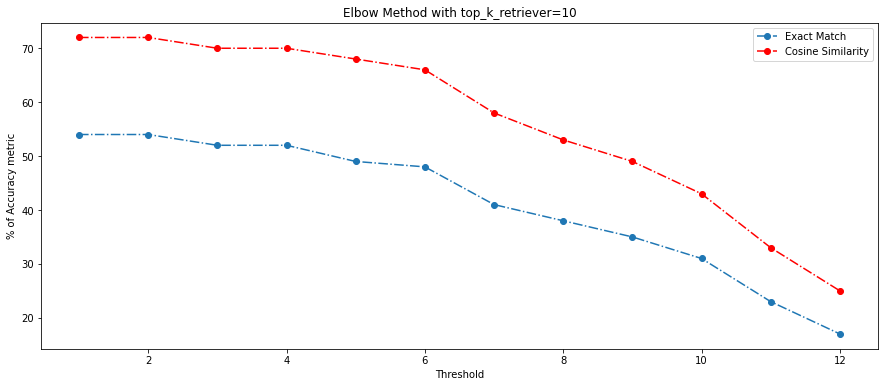

In [29]:
accuracy_rnd = []
cosine_rnd = []
for threshold in range(1,13):
        accuracy_rnd.append(round(exact_match_metric(pred_articles_list = threshold_reader(reader10_df, score_threshold=threshold), 
                   answers_list = list(result['Combined'])),0))
        cosine_rnd.append(round(cosine_similarity_metric(pred_articles_list = threshold_reader(reader10_df, score_threshold=threshold), 
                   answers_list = list(result['Combined'])),0))
        
plt.figure(figsize=(15,6))
plt.plot(range(1,13), accuracy_rnd, '-.',
         marker='o', label='Exact Match')
plt.plot(range(1,13), cosine_rnd, '-.',
         marker='o', c='r', label='Cosine Similarity')
plt.title('Elbow Method with top_k_retriever=10')

plt.xlabel("Threshold")
plt.ylabel("% of Accuracy metric")
plt.legend()
plt.show()

---

# Conclusion

## The best model has a top_k_retriever of 5 and the threshold set at 6.